In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [36]:
n = 500
start_date = '2024-01-01'
end_date = '2024-12-31'
dates = pd.date_range(start='2024-01-01', periods=n, freq='D')
random_date = random.choice(dates)
print("Random date:", random_date)

Random date: 2024-07-21 00:00:00


In [37]:
n = 500

np.random.seed(42)
categories = np.random.choice(['Sports', 'Technology', 'Food', 'Travel', 'Fashion'], size=n)
likes = np.random.randint(low=0, high=10001, size=n)


data_dict = {
    'Date': dates,
    'Category': categories,
    'Likes': likes
}

df = pd.DataFrame(data_dict)
df.head()

,Date,Category,Likes
0,2024-01-01,Travel,8787
1,2024-01-02,Fashion,728
2,2024-01-03,Food,1365
3,2024-01-04,Fashion,4492
4,2024-01-05,Fashion,698


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


In [39]:
df.describe()

,Date,Likes
count,500,500.00000
mean,2024-09-06 12:00:00,4947.16200
min,2024-01-01 00:00:00,5.00000
25%,2024-05-04 18:00:00,2548.00000
50%,2024-09-06 12:00:00,5089.00000
75%,2025-01-09 06:00:00,7239.25000
max,2025-05-14 00:00:00,9945.00000
std,NaN,2796.28173


In [40]:
category_counts = df['Category'].value_counts()
print(category_counts)

Category
Travel        112
Sports        109
Technology     95
Fashion        93
Food           91
Name: count, dtype: int64


In [41]:
df.dropna(inplace=True)

In [42]:
df.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
num_duplicate_rows = len(df) - len(df.drop_duplicates())
print("Duplicate Rows:", num_duplicate_rows)

Duplicate Rows: 0


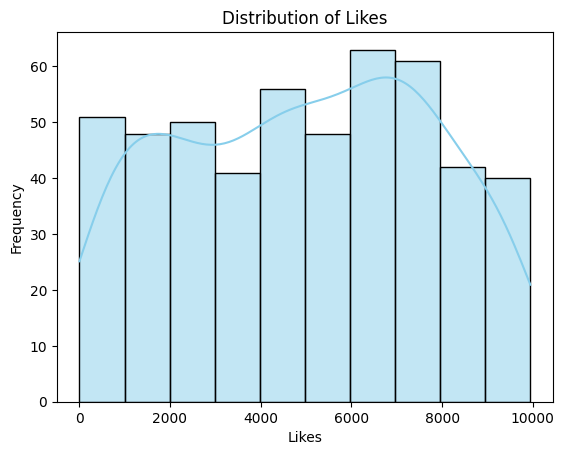

In [45]:
sns.histplot(data=df, x='Likes', kde=True, color='skyblue')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

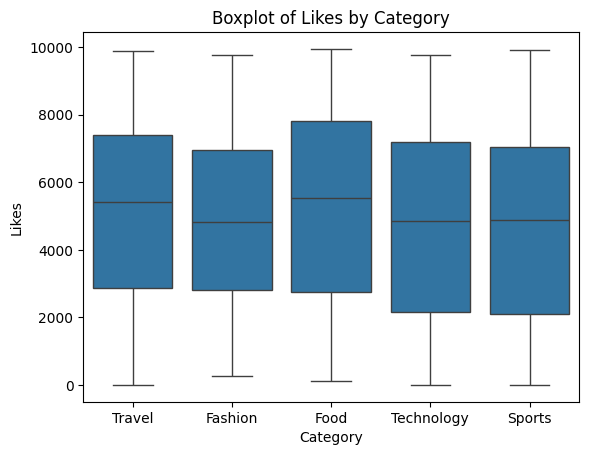

In [46]:
sns.boxplot(x='Category', y='Likes', data=df)
plt.xlabel('Category')
plt.ylabel('Likes')
plt.title('Boxplot of Likes by Category')
plt.show()

In [47]:
mean_likes = df['Likes'].mean()
print(f"Avg Likes per post: {mean_likes:.2f}")

Avg Likes per post: 4947.16


In [48]:
mean_likes_by_category = df.groupby('Category')['Likes'].mean()
print(mean_likes_by_category)

Category
Fashion       5021.247312
Food          5204.021978
Sports        4629.201835
Technology    4767.568421
Travel        5138.723214
Name: Likes, dtype: float64


In [49]:
df['Date'] = df['Date'].dt.strftime('%Y%m%d').astype(int)
df

,Date,Category,Likes
0,20240101,Travel,8787
1,20240102,Fashion,728
2,20240103,Food,1365
3,20240104,Fashion,4492
4,20240105,Fashion,698
...,...,...,...
495,20250510,Sports,3876
496,20250511,Food,5959
497,20250512,Sports,126
498,20250513,Sports,3177


In [50]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df[['Category']], drop_first=True)  # One-hot encoding
y = df['Likes']

# Initialize the linear regression model
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)


LinearRegression()

In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
y_pred

R-squared: -0.0256
Mean Squared Error (MSE): 8037666.0471


array([4994.52222222, 4720.60526316, 4632.45679012, 4632.45679012,
       4632.45679012, 5240.82666667, 4720.60526316, 4632.45679012,
       4994.52222222, 5369.78205128, 5240.82666667, 4994.52222222,
       4632.45679012, 4632.45679012, 4994.52222222, 4632.45679012,
       4632.45679012, 5369.78205128, 5369.78205128, 5240.82666667,
       4632.45679012, 5240.82666667, 4720.60526316, 4994.52222222,
       4632.45679012, 4720.60526316, 4632.45679012, 4994.52222222,
       4632.45679012, 4994.52222222, 5240.82666667, 4632.45679012,
       4632.45679012, 4994.52222222, 5369.78205128, 5240.82666667,
       4994.52222222, 4632.45679012, 4994.52222222, 4720.60526316,
       5240.82666667, 5369.78205128, 5369.78205128, 4994.52222222,
       4632.45679012, 4994.52222222, 4994.52222222, 5369.78205128,
       5240.82666667, 4994.52222222, 5240.82666667, 4632.45679012,
       5240.82666667, 4720.60526316, 4720.60526316, 4632.45679012,
       4720.60526316, 4632.45679012, 4994.52222222, 4994.52222

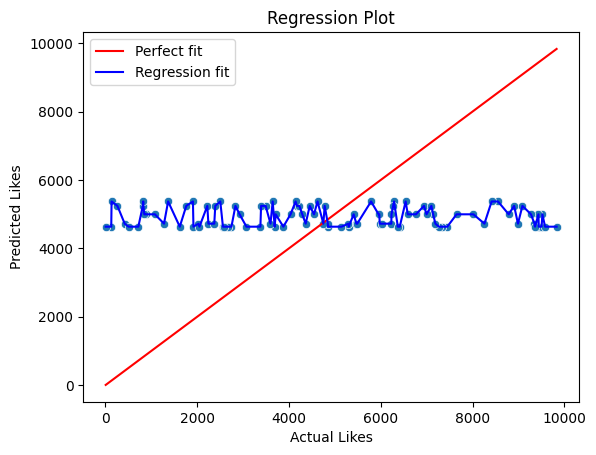

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Add the regression line
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect fit')
sns.lineplot(x=y_test, y=y_pred, color='blue', label='Regression fit')

plt.xlabel("Actual Likes")
plt.ylabel("Predicted Likes")
plt.title("Regression Plot")
plt.legend()
plt.show()



In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=3)
scores

array([-0.00134432, -0.00796681, -0.01237035])

In [58]:
from sklearn.linear_model import Ridge
X2 = df[['Date']]
y2 = df['Likes']

# Initialize the linear regression model
model2 = LinearRegression()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

alpha = 10  # Adjust this value as needed
model2 = Ridge(alpha=alpha)

# Fit the model
model2.fit(X2_train, y2_train)

Ridge(alpha=10)

In [59]:
y_pred2 = model2.predict(X2_test)
r_squared2 = r2_score(y2_test, y_pred2)
mse2 = mean_squared_error(y2_test, y_pred2)

print(f"R-squared: {r_squared2:.4f}")
print(f"Mean Squared Error (MSE): {mse2:.4f}")
print(y_pred2)

R-squared: 0.0089
Mean Squared Error (MSE): 7766806.2880
[5023.37267763 5040.11868734 4860.46133233 5034.79958239 5038.28451322
 4860.0944975  4860.4063071  5036.63375651 5040.21039605 4856.48117449
 5043.86040254 5032.8003326  4858.60881647 5039.91692819 4860.51635755
 4860.20454795 4853.10629411 5043.47522598 5025.48197787 4858.57213298
 4853.19800281 4853.17966107 5027.40786069 5023.46438634 5040.06366212
 4855.01383519 4853.06961063 5032.488523   5038.33953844 5025.15182653
 4854.75705082 5023.83122116 4856.6645919  5034.46943105 5043.98879473
 5025.17016827 4858.55379124 5040.17371256 5032.52520649 5040.30210475
 4860.27791492 5038.48627237 4854.5736334  5032.96540827 5042.15462061
 5040.04532038 5044.02547822 5043.82371906 4858.4437408  5043.62195991
 5040.13702908 5033.0204335  5036.50536433 4858.5354495  5032.81867435
 5041.75110231 5036.19355473 5043.69532687 5032.61691519 5040.02697863
 4853.12463585 5029.02193392 5025.35358568 4854.61031689 5040.00863689
 5042.04457017 4856.

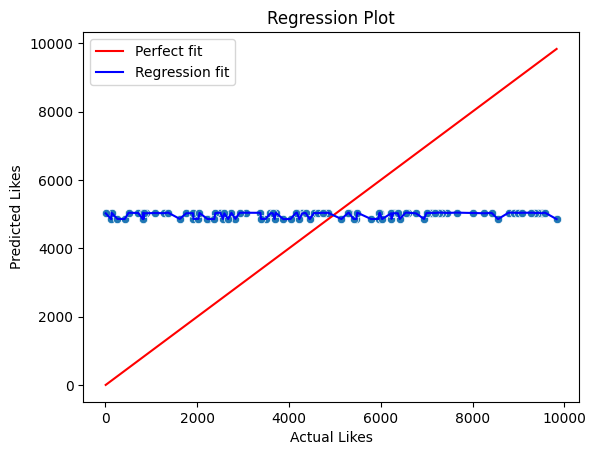

In [60]:
# Create a scatter plot
sns.scatterplot(x=y2_test, y=y_pred2)

# Add the regression line
sns.lineplot(x=y2_test, y=y2_test, color='red', label='Perfect fit')
sns.lineplot(x=y2_test, y=y_pred2, color='blue', label='Regression fit')

plt.xlabel("Actual Likes")
plt.ylabel("Predicted Likes")
plt.title("Regression Plot")
plt.legend()
plt.show()

In [61]:
X = pd.concat([pd.get_dummies(df[['Category']], drop_first=True), df[['Date']]], axis=1)
# Initialize the linear regression model
model3 = LinearRegression()

# Fit the model to the data
model3.fit(X, y)



predicted_likes = model3.predict(X)
print("Predicted Like Count:", predicted_likes[0])

Predicted Like Count: 5267.934670892195


In [62]:
y_pred3 = model3.predict(X)
r_squared3 = r2_score(y, y_pred3)
mse3 = mean_squared_error(y, y_pred3)

print(f"R-squared: {r_squared3:.4f}")
print(f"Mean Squared Error (MSE): {mse3:.4f}")
print(y_pred3)

R-squared: 0.0116
Mean Squared Error (MSE): 7712689.8202
[5267.93467089 5206.50885094 5327.82367294 5206.4128696  5206.36487893
 4945.1520936  5327.63171025 5327.58371958 5327.5357289  5206.12492557
 5267.45476417 5327.39175689 5205.98095355 4944.76816822 5267.26280148
 4944.67218688 5267.16682014 5205.74100019 4771.44266459 5267.02284812
 4944.43223352 5205.5490375  5266.87887611 4771.20271123 4771.15472055
 5326.71988748 5326.67189681 4944.09629881 5266.59093207 5266.5429414
 5326.47993412 5263.13560369 5263.08761301 4767.41144813 5322.97661506
 5201.56581172 5322.88063371 5201.46983038 4767.17149477 4940.20905438
 5262.70368764 4767.02752276 5262.60770629 4940.01709169 4939.96910102
 4766.83556007 4939.87311967 5200.98992366 4939.77713833 5262.27177159
 5262.22378092 5262.17579025 5262.12779957 5200.70197962 5322.01680162
 4766.35565335 5261.93583689 4939.34522228 5261.83985554 4939.24924094
 4935.79391255 5258.28854581 5196.86272586 4935.64994053 4935.60194986
 5258.09658312 4935.5

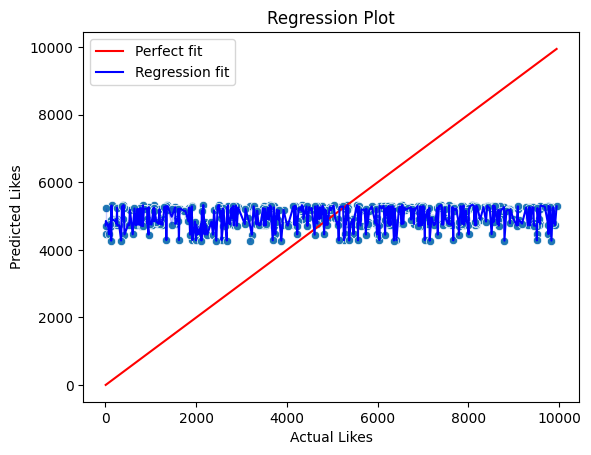

In [63]:
sns.scatterplot(x=y, y=y_pred3)

# Add the regression line
sns.lineplot(x=y, y=y, color='red', label='Perfect fit')
sns.lineplot(x=y, y=y_pred3, color='blue', label='Regression fit')

plt.xlabel("Actual Likes")
plt.ylabel("Predicted Likes")
plt.title("Regression Plot")
plt.legend()
plt.show()